# Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. 

Нам необходимо изучить рынок российского кинопроката и выявить текущие тренды.

Подробнее мы рассмотрим фильмы, которые получили государственную поддержку. 

Данные получены из портала открытых данных Министерства культуры.

Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

План действий следующий:
- Изучим исходные данные и объединим их в одну таблицу
- Выполним предобработку
- Выделим наиболее важные для исследования показатели
- Проанализируем их
- Сделаем выводы на основе анализа данных

### Файлы с данными

In [1]:
import pandas as pd
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.express as px
init_notebook_mode(connected=True)
# импортирование необходимых библиотек

In [2]:
mkrf_movies = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv') 
mkrf_shows = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')
#cчитываем данные в одноименные переменные

Информация о датафреймах

In [3]:
mkrf_movies.info()
print('\n', '---------------------------------', '\n')
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Для того, чтобы соединить их в один необходимо выбрать столбец, по которому будет происходить соединение, причем тип данных должен совпадать. А чтобы изменить тип данных на одинаковый, необходимо, чтобы не возникало ошибок. В нашем случае ошибки могут возникнуть, когда мы пытаемся нечисловую переменную изменить на числовую. Это происходит при следующих значениях:

In [4]:
not_numeric_list = list(mkrf_movies.loc[~(mkrf_movies['puNumber'].str.isnumeric()),'puNumber'])
print(not_numeric_list)

[' 111004112', 'нет']


В одном случае вначале строки стоит пробел, а в другом вместо числа строка "нет"

Для исправления таких ошибок сделаем функцию: примем как аргумент список с нечисловыми элементами, и вернем их сделав целым числом, удалив лишние пробелы. В случае строки, не содержащей число, вернем число 0.

In [5]:
def corrected(list_to_correct):
    ans = []
    for elem in list_to_correct:
        elem = elem.replace(' ', '')
        try:
            ans.append(int(elem))
        except:
            ans.append(0)
    return ans

In [6]:
mkrf_movies.loc[~(mkrf_movies['puNumber'].str.isnumeric()),'puNumber'] = corrected(not_numeric_list)
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')

In [7]:
mkrf_movies.info()
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Теперь, когда совпадает тип данных, мы можем соединить таблицы.

In [8]:
df = mkrf_movies.merge(mkrf_shows, how='left', on='puNumber')
df.info() # информация о новом датафрейме

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [9]:
df.head() # первые строки

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


### Предобработка данных

In [10]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int32  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Для начала преобразуем столбец __show_start_date__, содержащий дату премьеры фильма, в __datetime__.

In [11]:
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%dT')
df['show_start_date'] = pd.to_datetime(df['show_start_date'].dt.date)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  7486 non-null   object        
 1   puNumber               7486 non-null   int32         
 2   show_start_date        7486 non-null   datetime64[ns]
 3   type                   7486 non-null   object        
 4   film_studio            7468 non-null   object        
 5   production_country     7484 non-null   object        
 6   director               7477 non-null   object        
 7   producer               6918 non-null   object        
 8   age_restriction        7486 non-null   object        
 9   refundable_support     332 non-null    float64       
 10  nonrefundable_support  332 non-null    float64       
 11  budget                 332 non-null    float64       
 12  financing_source       332 non-null    object        
 13  rat

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Теперь следует преобразовать столбец __ratings__ в дробный тип. Посмотрим на значения столбца рейтинга фильма.

In [12]:
df['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Содержится рейтинг, выраженный в процентах. Посчитаем, сколько таких значений имеется в датасете

In [13]:
errors = 0
for i in df['ratings']:
    try:
        float(i)
    except:
        errors += 1
print(errors)

29


Количество их очень мало, это значит их можно заменить на NaN.

In [14]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

Теперь преобразуем рейтинг в float

In [15]:
df['ratings'] = df['ratings'].astype(float)
df.dtypes # типы данных после обработки

title                            object
puNumber                          int32
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
box_office                      float64
dtype: object

#### Пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [16]:
fig = px.bar(df.isna().mean().sort_values(), title='Процент пропусков по столбцам')
fig.update_layout(showlegend=False)
fig.show()

In [17]:
df.isna().mean().sort_values()

title                    0.000000
puNumber                 0.000000
show_start_date          0.000000
type                     0.000000
age_restriction          0.000000
production_country       0.000267
director                 0.001202
film_studio              0.002404
producer                 0.075875
genres                   0.130377
ratings                  0.133048
box_office               0.578146
refundable_support       0.955651
nonrefundable_support    0.955651
budget                   0.955651
financing_source         0.955651
dtype: float64

Выше приведен график и таблица процента пропусков по столбцам, в некоторых случаях он достигает 95%.

Одинаковый процент пропусков в __refundable_support, nonrefundable_support, budget, financing_source__ обусловлен тем, что эти данные указаны только для тех фильмов, которые получили государственную поддержку. Следовательно, оставшиеся фильмы её не получили. Заполним эти значения нулём.

In [18]:
cols_to_fill = ['refundable_support', 'nonrefundable_support']
for col in cols_to_fill:
    df[col] = df[col].fillna(0)

У фильмов, не получивших поддержку, нет государственного источника финансирования.

In [19]:
df['financing_source'] = df['financing_source'].fillna('нет')

Неизвестные жанры заполним строкой 'прочие'

In [20]:
df['genres'].fillna('прочие', inplace=True)

In [21]:
cols_to_fill = ['film_studio', 'production_country', 'producer', 'director']
for col in cols_to_fill:
    df[col].fillna('неизвестно', inplace=True)

Столбцы с пропусками в количественных значениях (рейтинг, сборы, бюджет (для фильмов без финансирования)) оставим без изменений. Заполнение таких значений может привести к искажениям в статистическом анализе.

In [22]:
fig = px.bar(df.isna().mean().sort_values(), title='Процент пропусков по столбцам после обработки')
fig.update_layout(showlegend=False)
fig.show()

#### Дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

В данных довольно много дубликатов. Часто это связано с тем, что в начале или конце строки стоят пробелы, различны написания слов, содержащих "ё".

In [23]:
def string_goodizer(s):
    s = s.strip()
    s.replace('ё', 'e')
    return s

In [24]:
columns_to_correct=['title','type', 'film_studio', 
                    'production_country', 'age_restriction',
                    'director', 'producer']

In [25]:
for column in columns_to_correct:
    df[column] = df[column].apply(string_goodizer)

In [26]:
df.duplicated(subset='title').sum()

714

Имеем 714 фильмов с идентичным названием.

In [27]:
df.duplicated(subset='puNumber').sum()

2

И два фильма с одинаковым номером прокатного удостоверения (которое, по идее, должно быть уникальным)

In [28]:
df = df.sort_values('box_office', ascending=False)
df = df.drop_duplicates(subset='title', keep="first")

Оставим только уникальные (по названию) фильмы в датасете, оставив наибольшее значение сборов

In [29]:
df = df.drop_duplicates(subset='puNumber', keep="first")

И фильмы с уникальныи номером прокатного удостоверения

Удалив дубликаты, мы потеряли менее 10% от исходного количества строк.

#### Категориальные значения


Для дискретных категориальных значений уместна замена ранговыми, обозначенными цифрами. Заменим таковые в столбце возрастного ограничения

In [30]:
df['age_restriction'].unique()

array(['«12+» - для детей старше 12 лет', '«6+» - для детей старше 6 лет',
       '«16+» - для детей старше 16 лет', '«18+» - запрещено для детей',
       '«0+» - для любой зрительской аудитории'], dtype=object)

In [31]:
def age_replace(s):
    if type(s) == str:
        if s[1:4] == '0+»': # 0 означает 0+
            return 0
        if s[1:4] == '6+»': # 1 означает 6+
            return 6
        if s[1:4] == '12+': # 2 означает 12+
            return 12
        if s[1:4] == '16+': # 3 означает 16+
            return 16
        if s[1:4] == '18+': # 4 означает 18+
            return 18
    else:
        return s

In [32]:
df['age_restriction'] = df['age_restriction'].apply(age_replace).astype('int') # меняем тип данных в этом столбце

In [33]:
import re
def split_comma(s):
    return s.split(',')
def split_dash_or_comma(s):
    return re.findall(r"[\w']+", s)

In [34]:
def space_clear(l):
    for i in range(len(l)):
        l[i] = l[i].strip()
    return l

In [35]:
df['production_country'] = df['production_country'].apply(split_dash_or_comma).apply(space_clear)
# разделяем страны в список, убирая лишние запятые и пробелы в начале и конце строки

In [36]:
cols = ['director', 'film_studio', 'producer', 'genres']
for col in cols:
    df[col] = df[col].apply(split_comma)
#разделяем столбцы 'director', 'film_studio', 'producer', 'genres' по запятой, это понадобится
#когда мы захотим выделить главный жанр, или главного режиссёра

In [37]:
df['financing_source'].unique()
# уникальные значения источника финансирования

array(['Фонд кино', 'нет', 'Министерство культуры',
       'Министерство культуры, Фонд кино'], dtype=object)

Часто в категориальных столбцах встречаются несколько значений (например может быть указано несколько стран, или несколько режиссёров), что может вызывать затруднения при группировке. Для того чтобы исправить эту проблему, столбцы с категориальными были преобразованы в тип данных list. Теперь достаточно выделить первый элемент списка, и сгруппировать по нему.

In [38]:
df['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

В типе фильма указано только одно значение - группировка не вызовет затруднений.

In [39]:
df['genres'].apply(lambda x: x[0]).unique()

array(['комедия', 'спорт', 'фантастика', 'драма', 'фэнтези', 'мультфильм',
       'боевик', 'триллер', 'прочие', 'история', 'аниме', 'ужасы',
       'биография', 'приключения', 'мелодрама', 'детектив', 'мюзикл',
       'семейный', 'вестерн', 'военный', 'криминал', 'документальный',
       'музыка', 'реальное ТВ', 'детский', 'для взрослых', 'концерт',
       'короткометражка', 'фильм-нуар'], dtype=object)

Для преобразованных в list значений можно без затруднений при необходимости добавить столбец с первым элементом, и сгруппировать уже по нему.

#### Количественные значения

Рассмотрим боксплоты столбцов бюджета и гос.поддержки. (для значений без пропусков)

In [40]:
df_notna_budget = df[~df['budget'].isna()]

In [41]:
%matplotlib INLINE

<AxesSubplot:>

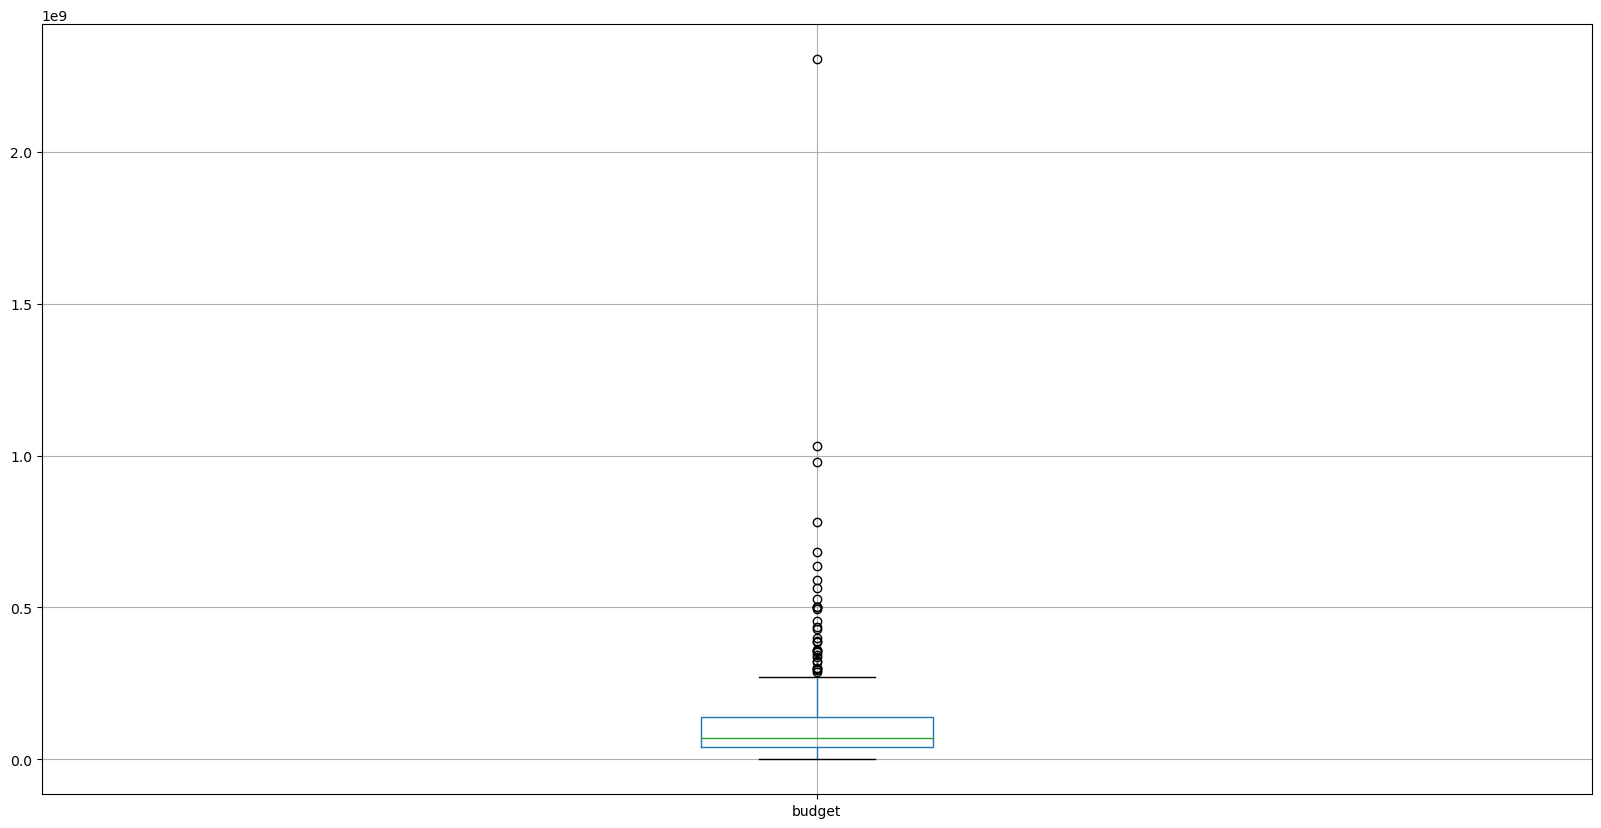

In [42]:
df_notna_budget.boxplot(column = ['budget'],figsize = (20, 10))

Самое большое значение - фильм "Тайна печати дракона". Бюджет картины составляет 2,3 млрд рублей. Сборы, согласно данным, составили 334 млн руб.

In [43]:
df.sort_values('budget', ascending=False).head(1)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7114,Тайна Печати Дракона,111012819,2019-09-12,Художественный,"[ООО ""Кинокомпания ""СТВ""; ООО ""РФГ Корп""; ООО ...","[Россия, Китай]",[О.Степченко],"[С.Сельянов, А.Петрухин]",6,180000000.0,90000000.0,2.305074e+09,Фонд кино,5.8,"[приключения, фэнтези]",3.335971e+08


В таблице много фильмов имеют нулевой бюджет.

In [44]:
df[df['budget'] == 0].shape[0]

17

Для того, чтобы это исправить, посчитаем, какую долю составляет бюджет от гос.финансирования у фильмов, получивших его. (далее речь пойдет только о таких)

In [45]:
k = (df['budget']/(df['refundable_support'] + df['nonrefundable_support'])).median()
k

1.625

Значит финансирование составляет в среднем:

In [46]:
1/k 

0.6153846153846154

62% от бюджета

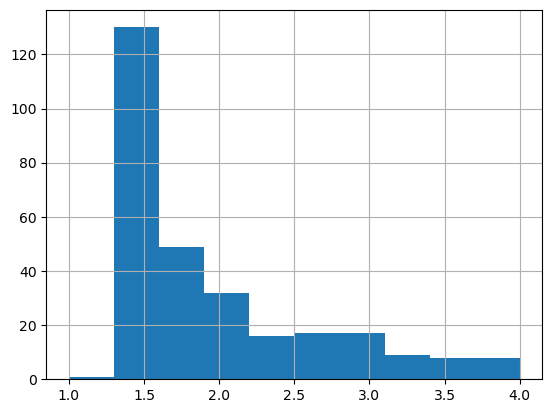

In [47]:
(df['budget']/(df['refundable_support'] + df['nonrefundable_support'])).hist(range=(1, 4), bins=10);

Значит, бюджет, в среднем, составляет k * ('refundable_support'+'nonrefundable_support'). Заполним нулевые значения бюджета этим значением.

In [48]:
df.loc[df['budget']==0, 'budget'] = (df.loc[df['budget']==0, 'nonrefundable_support'] + 
                                     df.loc[df['budget']==0, 'refundable_support']) * k

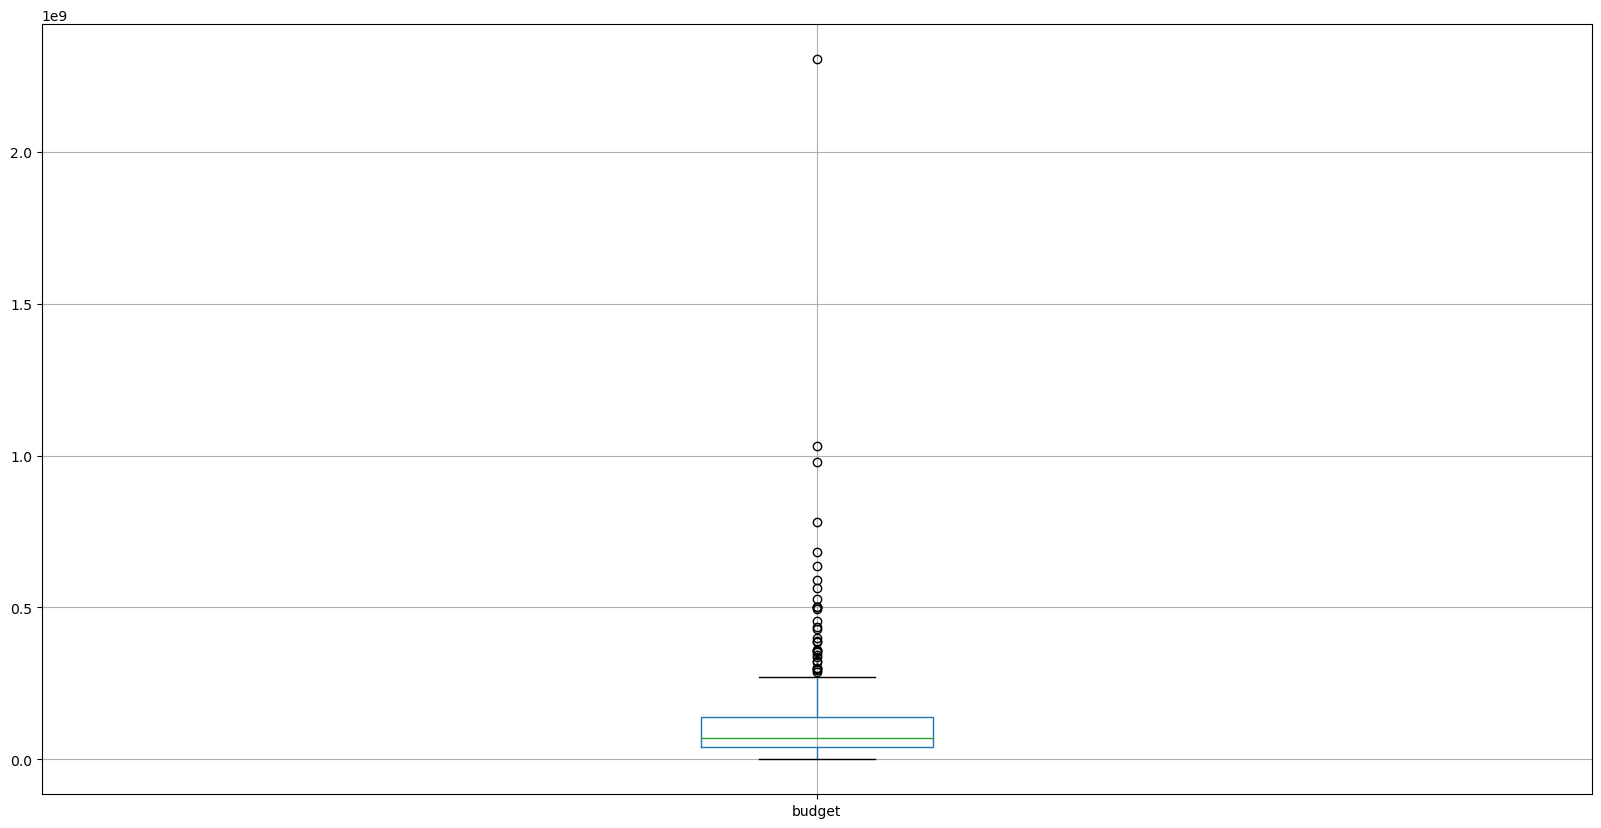

In [49]:
df_notna_budget.boxplot('budget', figsize = (20, 10));

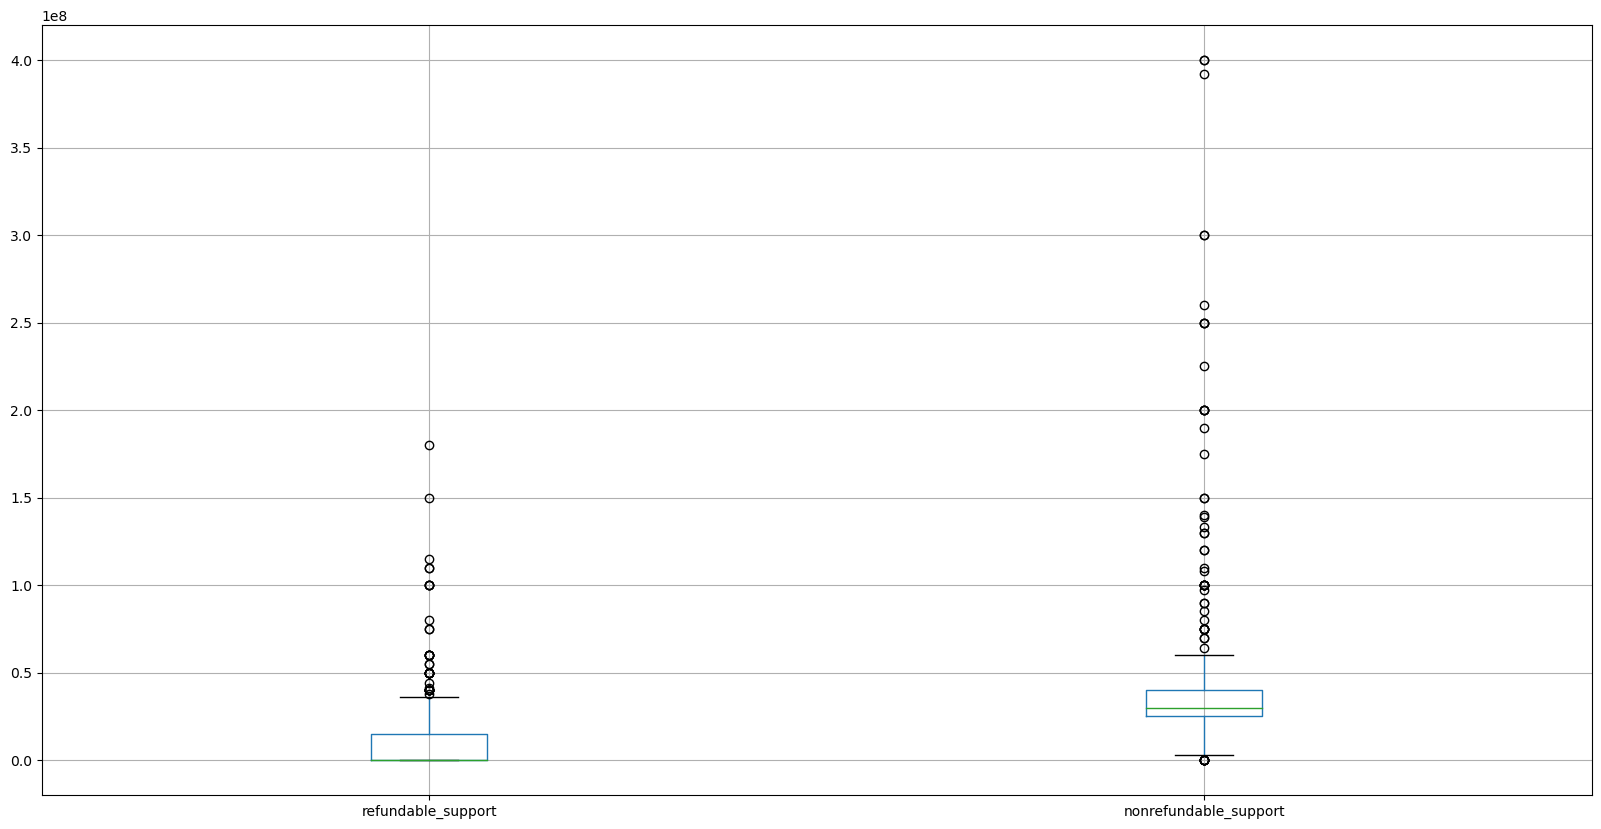

In [50]:
df_notna_budget.boxplot(column = ['refundable_support', 'nonrefundable_support'],figsize = (20, 10));

Cогласно данным, половина финансированных фильмов не получили возвратной поддержки.

В таблице встречаются значения кассовых сборов, равные нулю. Так как эти данные восстановить проблематично, и они могут негативно повлиять на рассчёты, исключим их из исследования. 

In [51]:
df = df[df['box_office'] != 0] #убираем фильмы без сборов

In [52]:
pd.options.mode.chained_assignment = None 

#### Новые столбцы





In [53]:
df['year_show'] = pd.DatetimeIndex(df['show_start_date']).year

In [54]:
df['main_director'] = df['director'].apply(lambda  x : x[0])

In [55]:
df['main_genre'] =  df['genres'].apply(lambda  x : x[0])

Государственная поддержка в среднем составляет:

In [56]:
1/k

0.6153846153846154

Для фильмов получивших эту поддержку.

In [57]:
df['support_part'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

### Исследовательский анализ данных


Изначально таблица mkrf_shows содержала сведения о показах фильмов в российских кинотеатрах и содержала столбец 'box_office'. Следовательно, в кинотеатрах показывали только те фильмы, для которых в df указана сумма сборов.

In [58]:
df_cinema = df[~df['box_office'].isna()]
df_cinema_pivot = df_cinema.pivot_table(index = 'year_show', aggfunc='count')['title']
fig = px.bar(df_cinema_pivot,
             title='Показы в кинотеатрах по годам',
            labels={'year_show':'Год показа',
                  'value':"Количество"})
fig.update_layout(showlegend=False)

Из графика можно понять, что в 2017 показали значительно меньше фильмов, чем в предыдущих годах. Динамика показывала рост с 2010 до 2016, и с 2017 до 2019.

In [59]:
df['hire'] = ~df['box_office'].isna()

In [60]:
fig = px.bar(df.groupby('year_show')['hire'].mean(),
      title='Доля фильмов с информацией о прокате по годам',
            labels={'year_show':'Год показа',
                  'value':"Доля"})
fig.update_layout(showlegend=False)

Полнее всего в данных представлен период с 2015 - 2019 гг.

Более того, имеет место гипотеза, о том, что до 2014 года данные о сборах были указаны в какой-то другой единице измерения.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [61]:
df_cinema_pivot = df_cinema_pivot = df_cinema.pivot_table(index = 'year_show', values = 'box_office',aggfunc='sum')
fig = px.bar(df_cinema_pivot, range_x = (None, 2020), title='Сумма сборов по годам')
fig.update_layout(showlegend=False)

Данные до 2014 года помимо того, что указаны менее полно, имеют (возможно) проблемы с указанными сборами.

С 2014 по 2017 года наблюдается тенденция роста сборов. С 2017 по 2019 г. сумма сборов закрепилась на уровне ~ 48 млрд. руб. При этом максимум достигался в 2017 г. Данные за прошлые года на порядки отличаются, и сравнивать их неуместно. года?

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [62]:
df[df['year_show'] >= 2015].pivot_table(index = 'year_show', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year_show,,
2015,8.605090e+07,5175580.500
2016,9.348838e+07,4505722.750
2017,1.360328e+08,9968340.000
2018,1.045651e+08,8891102.210
2019,9.171415e+07,4693586.595


In [63]:
fig = px.bar(df.pivot_table(index = 'year_show', values='box_office', aggfunc='mean'),
      title='Средний сбор по годам',
            labels={'year_show':'Год показа',
                  'value':"Значение среднего сбора"})
fig.update_layout(showlegend=False)

In [64]:
fig = px.bar(df.pivot_table(index = 'year_show', values='box_office', aggfunc='median'),
      title='Медианный сбор по годам',
            labels={'year_show':'Год показа',
                  'value':"Значение медианного сбора"})
fig.update_layout(showlegend=False)

Есть много вопросов к датасету - например, не менялись ли способы сбора данных за этот период, так как в сравнении с 2010, в 2017 доля фильмов с указанной информацией о прокате возросла почти в 6 раз. (12% и 71% соответственно, это указано в графике 'Доля фильмов с информацией о прокате по годам'). С годами картина меняется и информации о прокате по отношению к общему количеству выпускаемых фильмов становится больше.

И помимо того, что самих фильмов за период 2010-2014 сильно меньше чем за последующие года, их доля с указанной информацией о прокате тоже гораздо меньше. Отсюда следует значительная разница как в среднем так и в медианном показателе.

Медианный показатель в несколько раз меньше среднего. Это следует из того, что он более устойчив к выбросам - в нашем случае к фильмам, получившим очень большую сумму кассового сбора. Однако пик - 2017 г. - в обоих показателях совпадает.

Далее будем рассматривать период, представленный в данных наиболее полно.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [65]:
df_group = df[df['year_show'] >= 2015].pivot_table(
    index = ['age_restriction','year_show'],
    values='box_office',
    aggfunc=['mean', 'median'])
df_group

mean        median
                             box_office    box_office
age_restriction year_show                            
0               2015       1.052925e+07  3.154816e+06
                2016       3.850854e+06  2.804263e+06
                2017       7.653298e+07  2.217896e+07
                2018       6.489800e+06  3.616937e+06
                2019       5.915356e+06  3.885434e+06
6               2015       1.641849e+08  2.038098e+07
                2016       1.826234e+08  4.240196e+06
                2017       2.685809e+08  5.199210e+07
                2018       1.486026e+08  1.468885e+07
                2019       1.586734e+08  1.287535e+07
12              2015       1.891123e+08  1.595967e+07
                2016       1.506719e+08  4.845355e+06
                2017       1.914982e+08  9.010548e+06
                2018       2.129447e+08  8.931966e+06
                2019       1.509492e+08  3.498501e+06
16              2015       6.848264e+07  4.878670e+06
                2016       9.414903e+07  5.667952e+06
                2017       1.549177e+08  9.702077e+06
                2018       1.057923e+08  9.010639e+06
                2019       7.164842e+07  3.210718e+06
18              2015       4.115385e+07  4.616615e+06
                2016       4.559681e+07  6.375092e+06
                2017       6.565643e+07  8.212677e+06
                2018       4.893903e+07  7.179466e+06
                2019       5.561330e+07  5.658057e+06

In [66]:
age_dict = {
            0:'0+',
            6:'6+',
            12:'12+',
            16:'16+',
            18:'18+',
        }
def plotting(col):
    for i in age_dict:
        box_office_mean = df_group.loc[i, col]['box_office']
        year = df_group.loc[i].index
        fig = px.bar(x=year, y=box_office_mean,
                     labels={'x': 'Год', 'y':'Средние сборы в рублях'},
                     title=f'Возрастное ограничение {age_dict[i]}');
        fig.show()
plotting('mean')

2017 год является лидирующим по средним сборам для всех возрастных ограничений, кроме "12+". Для "12+" самые большие средние сборы зафиксированы в 2018 году.

Однако рассчет среднего значения подвержен искажению из за сильно отличающихся значений. Посчитаем медианые сборы по годам для каждого возрастного ограничения.

In [67]:
df_group_year = df[df['year_show'] >= 2015].pivot_table(
    index = ['year_show', 'age_restriction',],
    values='box_office',
    aggfunc=['mean', 'median'])
df_group_year

mean        median
                             box_office    box_office
year_show age_restriction                            
2015      0                1.052925e+07  3.154816e+06
          6                1.641849e+08  2.038098e+07
          12               1.891123e+08  1.595967e+07
          16               6.848264e+07  4.878670e+06
          18               4.115385e+07  4.616615e+06
2016      0                3.850854e+06  2.804263e+06
          6                1.826234e+08  4.240196e+06
          12               1.506719e+08  4.845355e+06
          16               9.414903e+07  5.667952e+06
          18               4.559681e+07  6.375092e+06
2017      0                7.653298e+07  2.217896e+07
          6                2.685809e+08  5.199210e+07
          12               1.914982e+08  9.010548e+06
          16               1.549177e+08  9.702077e+06
          18               6.565643e+07  8.212677e+06
2018      0                6.489800e+06  3.616937e+06
          6                1.486026e+08  1.468885e+07
          12               2.129447e+08  8.931966e+06
          16               1.057923e+08  9.010639e+06
          18               4.893903e+07  7.179466e+06
2019      0                5.915356e+06  3.885434e+06
          6                1.586734e+08  1.287535e+07
          12               1.509492e+08  3.498501e+06
          16               7.164842e+07  3.210718e+06
          18               5.561330e+07  5.658057e+06

In [68]:
import matplotlib.pyplot as plt

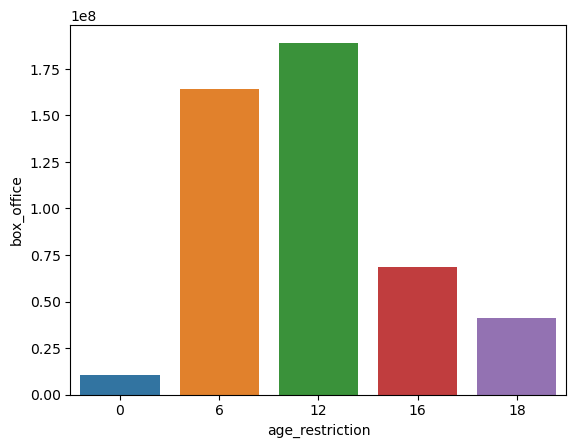

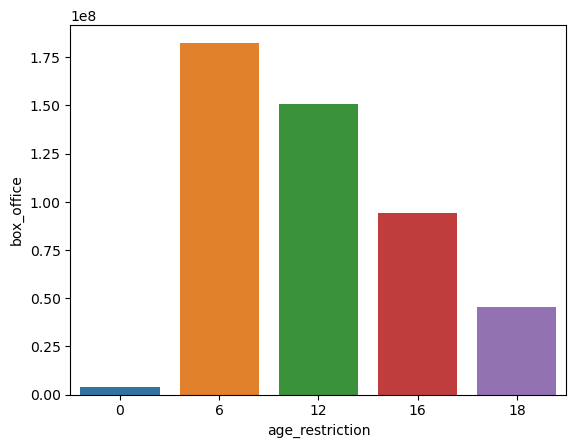

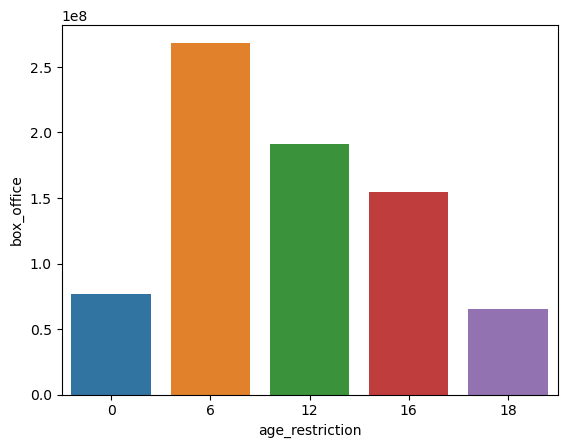

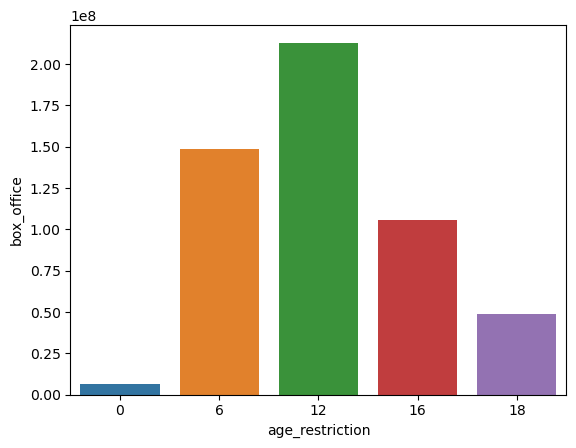

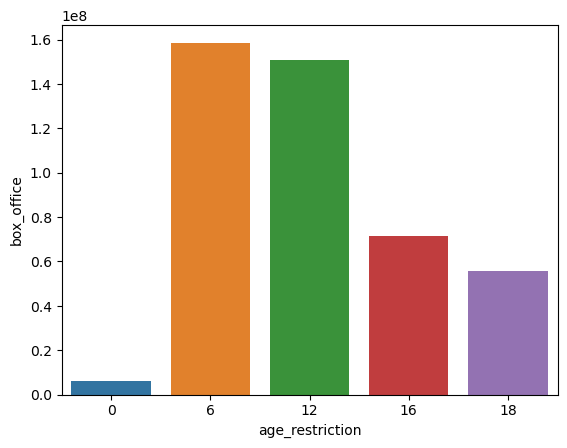

In [69]:
for i in range(2015, 2020):
    box_office_mean = df_group_year.loc[i, 'mean']['box_office']
    age = df_group_year.loc[i].index
    fig = sns.barplot(x=age, y=box_office_mean);
    plt.show()

In [70]:
plotting('median')

Картина похожая, однако для "12+" самый большой год по медианным сборам теперь - 2015.

Чтобы ответить на вопрос о том, влияет ли возрастное ограничение на сборы, нам необходимо посчитать медианный сбор денег для каждого возрастного ограничения.

In [71]:
px.bar(x = age_dict,
       y = df.groupby('age_restriction')['box_office'].median(),
       labels={'x':'Возрастное ограничение',
              'y':'Медианный сбор'},
      title='Медианный сбор денег для каждого возрастного ограничения.')

Средний фильм с ограничением "6+" собирает гораздо больше остальных. На втором месте фильмы с ограничением "18+".

Посмотрим, какого жанра фильмы собирают больше всего денег.

In [72]:
fig = px.bar(df.groupby(['main_genre'])['box_office'].sum().sort_values(ascending=False).head(10),
             labels={'main_genre':'Основной жанр',
              'value':'Сумма сборов'},
            title='Сумма сборов по жанрам')
fig.update_layout(showlegend=False)

In [73]:
df['country'] = df['production_country'].apply(lambda x: x[0])

In [74]:
fig = px.bar(df.groupby(['country'])['box_office'].sum().sort_values(ascending=False).head(5),
             labels={'country':'Cтрана',
              'value':'Сумма сборов'},
            title='Сумма сборов по странам')
fig.update_layout(showlegend=False)

Самые кассовые фильма производства США.

Медианный рейтинг Российских фильмов:

In [75]:
df[df['country'] == 'Россия']['ratings'].median()

6.3

### Исследование фильмов, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [76]:
df_support = df[df['nonrefundable_support'] + df['refundable_support'] != 0] # для тех значений, где поддержка не равна 0
df_support['full_support'] = df['refundable_support'] + df['nonrefundable_support']  # посчитаем столбец суммарной поддержки
df_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,year_show,main_director,main_genre,support_part,hire,country,full_support
7456,Холоп,111021719,2019-12-19,Художественный,"[ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""]",[Россия],[К.Шипенко],"[Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Ба...",12,25000000.0,...,6.8,[комедия],3.073569e+09,2019,К.Шипенко,комедия,0.375000,True,Россия,60000000.0
5653,Движение вверх,111011817,2017-12-21,Художественный,"[ООО ""Студия ""ТРИТЭ"" Никиты Михалкова""]",[Россия],[А.Мегердичев],"[Л.Верещагин, А.Златопольский, Н.Михалков, ...",6,0.0,...,7.5,"[спорт, драма]",2.779686e+09,2017,А.Мегердичев,спорт,0.677745,True,Россия,400000000.0
6549,Т-34,111024918,2018-12-21,Художественный,"[ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""...",[Россия],[А.Сидоров],"[А.Златопольский, Р.Дишдишян, Л.Блаватник, ...",12,60000000.0,...,6.5,"[драма, военный, боевик]",2.271754e+09,2018,А.Сидоров,драма,0.319271,True,Россия,180000000.0
5505,Последний богатырь,111007017,2017-10-19,Художественный,"[ООО ""Киностудия ""Слово"" по заказу ООО ""Уолт Д...",[Россия],[Д.Дьяченко],"[Э.Илоян, Д.Жалинский, М.Озкан, А.Троцюк, ...",12,50000000.0,...,6.8,"[комедия, фэнтези, приключения]",1.655038e+09,2017,Д.Дьяченко,комедия,0.283706,True,Россия,100000000.0
5708,Лёд,111000518,2018-02-01,Художественный,"[ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""...",[Россия],[О.Трофим],"[М.Врубель, А.Андрющенко, Ф.Бондарчук, Д.Ру...",12,25000000.0,...,NaN,[прочие],1.445732e+09,2018,О.Трофим,прочие,0.572062,True,Россия,85000000.0


In [77]:
fig = px.bar(df_support,
       x = 'year_show',
       y = ['nonrefundable_support', 'refundable_support'],
       labels={'year_show':'Год выпуска',
              'value': 'Объем поддержки'},
       title = 'Объем государственной поддержки по годам'
      )
fig.update_layout(legend=dict(
    title="Тип поддержки"
))
newnames = {
    'nonrefundable_support': 'невозвратные средства',
    'refundable_support': "возвратные средства"
}
fig.for_each_trace(lambda t: t.update(name = newnames[t.name]
                                     )
                  )
fig.show()

Объем выделенных средств рос до 2016 года, после чего резко упал, и продолжил расти до 2019.

Рассмотрим средний рейтинг фильмов, получивших гос. поддержку.

In [78]:
fig = px.histogram(df_support['ratings'],
                   labels={'count':'Количество',
                  'value': 'Рейтинг'},
                  title = 'Рейтинг фильмов, получивших гос.поддержку')
fig.add_vline(x=df_support['ratings'].median(), line_dash = 'dash', line_color = 'firebrick')
fig.update_layout(showlegend=False)
fig.show()

Красной прерывистой линией на графике обозначен медианный рейтинг, который равен:

In [79]:
df_support['ratings'].median()

6.2

Это незначительно ниже чем медианный рейтинг всех российских фильмов (6.3)

Для сравнения средний рейтинг по всем фильмам, немного выше и равен:

In [80]:
df['ratings'].median()

6.6

Проверим какие фильмы, из тех, что получили гос. поддержку, окупают вложенные гос-вом средства.

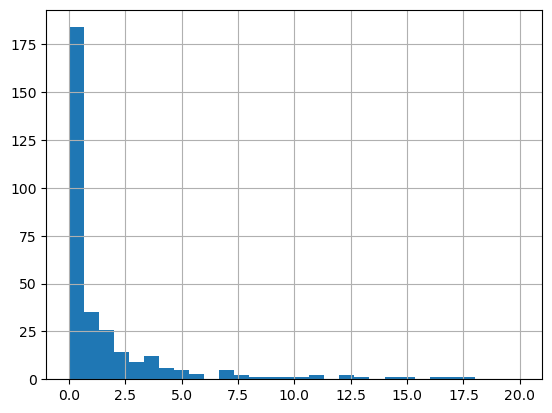

In [81]:
df_support['payback'] = df['box_office'] / (df_support['full_support']) 
# посмотрим как сборы соотносятся c вложенными средствами
# тогда значения меньшие 1 - убыточные фильмы
df_support['payback'].hist(range=(0,20), bins=30);

Как можно понять, большинство этих фильмов убыточны. Для того, чтобы понять какие факторы влияют на окупаемость, построим матрицу корелляции.

Будем рассматривать такие факторы как бюджет, рейтинг, возрастное ограничение.

In [82]:
df_support[['ratings', 'budget', 'age_restriction', 'payback']].corr()

,ratings,budget,age_restriction,payback
ratings,1.000000,0.104802,0.002152,0.071819
budget,0.104802,1.000000,-0.199621,0.107228
age_restriction,0.002152,-0.199621,1.000000,-0.082226
payback,0.071819,0.107228,-0.082226,1.000000


Особо выраженного влияния ни один из этих факторов не имеет. Но сильнее всего из них влияет рейтинг. Влияние бюджета фильма незначительно. Отрицательно влияет на окупаемость возрастное ограничение - чем оно выше, тем меньше окупаемость (но всё так же незначительно).

Зависит ли рейтинг фильма от бюджета и вложенных средств? Согласно данным о корелляции, в среднем, рейтинг у фильмов с большим бюджетом немного выше.

In [83]:
df_support[['ratings', 'budget', 'full_support']].corr()

,ratings,budget,full_support
ratings,1.000000,0.104802,0.130857
budget,0.104802,1.000000,0.729700
full_support,0.130857,0.729700,1.000000


И немного выше, у фильмов, получивших больше финансирования

In [84]:
fig = px.bar(df_support.groupby(['main_genre'])['box_office'].sum().sort_values(ascending=False).head(10),
             labels={'main_genre':'Основной жанр',
              'value':'Сумма сборов'},
            title='Сумма сборов по жанрам')
fig.update_layout(showlegend=False)

Среди фильмов, получивших гос. поддержку самый "кассовый" жанр - комедия. Это отличается от остальных фильмов, где лидер сборов - фантастика. Посмотрим на самый кассовые фильмы по возрастному ограничению.

In [85]:
fig = px.bar(y = df_support.groupby(['age_restriction'])['box_office'].sum().head(10),
             x = age_dict,
             labels={'x':'Возрастное граничение',
              'y':'Cумма сборов'},
            title='Cумма сборов по возрастному ограничению')
fig.update_layout(showlegend=False)

Лидер сборов - фильмы "12+".

In [86]:
fig = px.bar(df_support.groupby(['main_genre'])['payback'].mean().sort_values(ascending=False).head(10),
             labels={'main_genre':'Основной жанр',
              'value':'Окупаемость'},
            title='Окупаемость по жанрам')
fig.update_layout(showlegend=False)

Биографические фильмы - в среднем, самый __окупаемый__ жанр среди кино, получившего финансирование.

In [87]:
fig = px.bar(y = df_support.groupby(['age_restriction'])['payback'].mean().head(10),
             x = age_dict,
             labels={'x':'Возрастное граничение',
              'y':'Окупаемость'},
            title='Окупаемость по возрастному ограничению')
fig.update_layout(showlegend=False)

Среди фильмов, получивших финансирование, фильмы с рейтингом 18+ - самые убыточные.

In [88]:
fig = px.bar(y = df_support.groupby(['financing_source'])['payback'].mean(),
             x = df_support.groupby(['financing_source'])['payback'].mean().index,
             labels={'x':'Источник финансирования',
              'y':'Окупаемость'},
            title='Окупаемость по источнику финансирования')
fig.update_layout(showlegend=False)

Фильмы, финансируемые из ФК в среднем более окупаемые.

### Общий вывод

#### Проблемы в данных
Во первых, необходима корректировка хранимых Министерством Культуры данных - почти все фильмы до 2014 по каким то причинам содержат некорректные значения сборов. (Возможно они раньше указывались в млн. или тыс. рублей, однако для подтверждения этой гипотезы недостаточно данных). Некоторые фильмы имеют одинаковый номер прокатного удостоверения, который, по идее, должен быть уникальным - для того, чтобы не возникала путаница в реестре.

#### Все фильмы
- Среди всех фильмов больше всего получают фильмы жанра фантастика. Однако в отечественном кино этот жанр имеет не такой успех.
- Медианный рейтинг фильмов - 6.6
- Самый кассовый год - 2017

#### Российские фильмы
- Медианный рейтинг 6.3

##### Фильмы с финансированием
Большинство фильмов, получивших поддержку не окупают вложенные государством средства. Ниже перечислены лучшие по окупаемости категории фильмов:
- Жанр - "Биография"
- Возрастное ограничение - "16+"
- Источник финансирования - "Фонд Кино"
- Больше всего сборов получают фильмы жанра "комедия". Наверняка, тут сыграл роль самый кассовый фильм "Холоп", серия фильмов "Ёлки" и подобные. 
- Самый дорогой фильм, получивший финансирование - "Тайна печати дракона" провалился в прокате. 
- Медианный рейтинг фильмов - 6.2